In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pitches = pd.read_csv("/Users/bradyhong/Downloads/archive/pitches.csv")

In [3]:
atbats = pd.read_csv('/Users/bradyhong/Downloads/archive/atbats.csv')

In [4]:
games = pd.read_csv('games.csv') 

In [5]:
names = pd.read_csv('/Users/bradyhong/Downloads/archive/player_names.csv')

In [6]:
# Merging pitches and atbats by ab_id
data = pd.merge(pitches, atbats, on = 'ab_id', how = 'left')

In [7]:
# Merging games data with pitches and atbats by g_id
data = pd.merge(data, games, on = 'g_id', how = 'left')

In [8]:
data1 = data.g_id.astype('str')

In [9]:
#Since the year is the first four characters, we will isolate those characters
data1 = data1.str[:4]

In [10]:
data['year'] = data1.values

In [11]:
# Using only 2018 year
data18 = data[data['year'] == '2018']

In [12]:
# Merging the data with names
data18 = pd.merge(data18, names, left_on = 'pitcher_id', right_on = 'id')

In [13]:
# Making speed as numeric
data18['speed'] = data18['speed'].str[:-3]
data18['speed'] = data18.speed.astype('int')

In [14]:
# Changing to numeric
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
data18['venue_name'] = number.fit_transform(data18['venue_name'])
data18['condition'] = number.fit_transform(data18['condition'])

In [15]:
def new_column(row):
    if row['direction'][:1] == 'O':
        return 1
    elif row['direction'][:1] == 'I':
        return 2
    else:
        return 0

In [16]:
# Changind dirction value to 0,1,2
data18['direction'] = data18.apply(new_column, axis=1)

In [17]:
new_data = pd.DataFrame(data18[['pitch_type', 'b_score', 's_count', 'outs', 'pitch_num', \
                            'on_1b', 'on_2b', 'on_3b', 'batter_id', 'inning', 'p_score', 'p_throws',\
                             'pitcher_id', 'stand', 'top', 'b_count',\
                          'venue_name','speed', 'direction',\
                          'temperature', 'condition']])

In [18]:
pXs = new_data.to_csv("pXs.csv")

Now we can get more specific with our scrubbing to further clean our dataset. We will create a new DataFrame called pXs (pitch X situation) and reduce our columns to game situational data. As much of the pitches file is individual statistics on the pitch thrown, it would defeat the purpose of attempting to predict a pitch if the data of the pitch was provided.

In [4]:
pXs = pd.read_csv("pXs.csv", index_col=[0])

In [5]:
pXs.isnull().sum()

pitch_type     6122
b_score           0
s_count           0
outs              0
pitch_num         0
on_1b             0
on_2b             0
on_3b             0
batter_id         0
inning            0
p_score           0
p_throws          0
pitcher_id        0
stand             0
top               0
b_count           0
venue_name        0
speed             0
direction         0
temperature       0
condition         0
dtype: int64

In [6]:
# Drop that has null pitch_type
pXs = pXs.dropna()

In [7]:
# Changing values to numeric
pXs.p_throws = pXs.p_throws.replace(['R', 'L'], [0,1])
pXs.stand = pXs.stand.replace(['R', 'L'], [0,1])
pXs.top = pXs.top.replace([True, False], [1,0])

In [8]:
pXs.pitch_type.value_counts()

FF    254086
SL    122796
FT     81617
CH     74606
CU     60360
SI     57970
FC     39061
KC     16327
FS     10365
KN       719
EP       204
PO        89
FO        84
SC        37
AB         1
Name: pitch_type, dtype: int64

In [9]:
# Deleting pitch types that have low value counts
pXs = pXs[pXs.pitch_type != 'AB']
pXs = pXs[pXs.pitch_type != 'UN']
pXs = pXs[pXs.pitch_type != 'EP']
pXs = pXs[pXs.pitch_type != 'SC']
pXs = pXs[pXs.pitch_type != 'PO']
pXs = pXs[pXs.pitch_type != 'FO']

In [10]:
df = pXs

In [11]:
features = pXs.drop('pitch_type', axis=1)

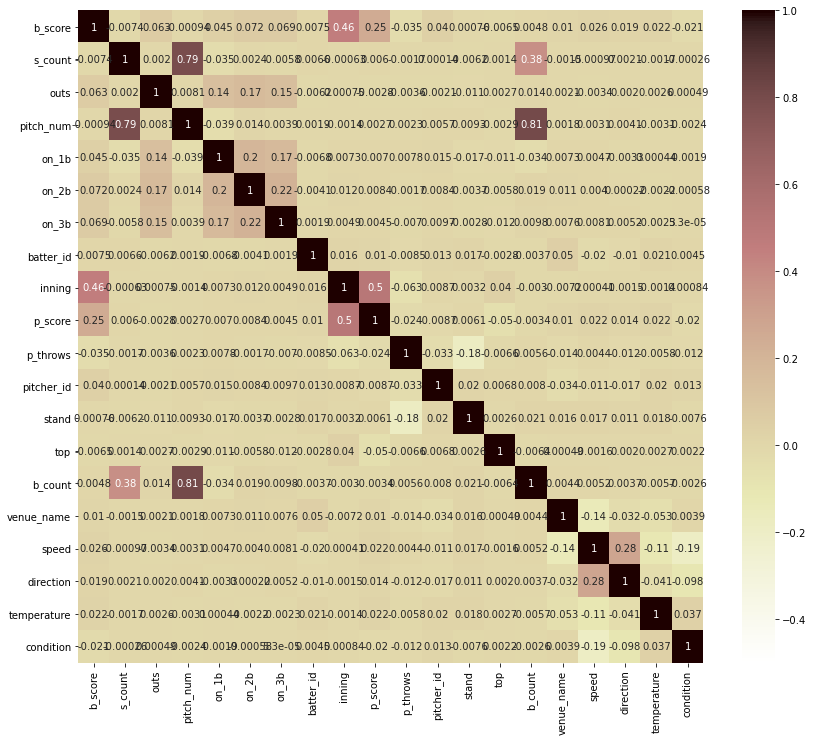

In [12]:
correlation = features.corr() 
plt.figure(figsize=(14,12)) 
heatmap = sns.heatmap(correlation, annot=True, linewidths = 0, vmin=-.5, cmap='pink_r')

In [13]:
# Drop pitch_num by looking at the correlation plots 
# pitch_num has strong correlation with b_count, s_count
features = features.drop('pitch_num', axis=1)

In [14]:
# y value = pitch_type
target = df['pitch_type']

In [16]:
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score
import xgboost as xgb
import random
from sklearn.model_selection import GridSearchCV

In [95]:
#splitting the train and test data for the XGB model
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30)
#create xgb instance out of the box
#clf = xgb.XGBClassifier()
#fit data
#clf.fit(X_train, y_train)
#make predictions
#training_preds = clf.predict(X_train)
#val_preds = clf.predict(X_test)
#run classification report and confusion matrix
#gbt_confusion_matrix = confusion_matrix(y_test, val_preds)
#print(gbt_confusion_matrix)
#gbt_classification_report = classification_report(y_test, val_preds)
#print(gbt_classification_report)

[23:57:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 3048   407   714 12798    43  2142   264     0  2015  1040]
 [  508  1792   761 10985    62  1335     0    15  1510  1190]
 [  615   226  4095  4444    73   832   342     0   765   269]
 [ 1588  1097  1232 61826   944  2259   590     6   820  6235]
 [    4    50    31  1361  1291   110    18     0    61   167]
 [  681   409   699  9081   103 10211   323     6     7  2879]
 [  181     0   131  2153    53   272  1539     0   408   131]
 [    0     0     0     0     0     0     0   203     0     0]
 [  710   412   459  2385    38     4   170     0 11824  1207]
 [  444   159   462 19122   208  2807   129     0  2554 10829]]
              precision    recall  f1-score   support

          CH       0.39      0.

In [96]:
# Doesn't work with n_jobs=-1. 
# 만약 계속 안되면 n_jobs=1로 해보셈
Xgb_train, Xgb_test, yxgb_train, yxgb_test = train_test_split(features, target, test_size=0.30)
xgb_param_grid = {"learning_rate": [.01,0.1,1],'max_depth': [2,6,10],'min_child_weight': [5,10,15],'n_estimators': [50, 100, 250]}
gs = GridSearchCV(clf, xgb_param_grid, n_jobs=1, cv=3)
gs.fit(Xgb_train, yxgb_train)

/Users/bradyhong/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:04:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:05:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[01:04:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:06:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:10:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:15:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/bradyhong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-96-9d8ecb6332de>", line 6, in <module>
    gs.fit(Xgb_train, yxgb_train)
  File "/Users/bradyhong/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/bradyhong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py", line 736, in fit
    self._run_search(evaluate_candidates)
  File "/Users/bradyhong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py", line 1188, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/Users/bradyhong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py", line 708, in evaluate_candidates
    out = parallel(delayed(_fit_and_score)(clone(base_estimator)

TypeError: object of type 'NoneType' has no len()

In [ ]:
gs.best_params_

In [ ]:
# put the parameter inside XGBClassifier that u got from gs.best_param
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30)
#create xgb instance with parameters
clf = xgb.XGBClassifier(learning_rate=0.1,max_depth=10,min_child_weight=15,n_estimators=250)
#fit data
clf.fit(X_train, y_train)
#make predictions
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
#run classification report and confusion matrix
gbt_confusion_matrix = confusion_matrix(y_test, val_preds)
print(gbt_confusion_matrix)
gbt_classification_report = classification_report(y_test, val_preds)
print(gbt_classification_report)

In [1]:
features.info()

NameError: name 'features' is not defined

In [ ]:
# KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
test_error = []
# Calculating error for K values of 1,4,9,16,25,36,49,64,81,100
for i in range(1, 10):
    print(i**2)
    knn = KNeighborsClassifier(n_neighbors=i**2)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    test_error.append(np.mean(pred_i != y_test))
a = min(test_error)
for i in range(0,len(test_error)):
    if test_error[i]==a:
        print(i)

1
4
9
16
25
36
49


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), test_error, color='grey', linestyle='dashed', marker='o', 
         markerfacecolor='black', markersize=7, label='Testing Set Error Rate')
plt.legend(fontsize = 15)
plt.title('Error Rate K Value', fontsize = 20)
plt.xlabel('K Value', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

In [ ]:
# Put the number that you got from KNN to n_neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=130)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred,zero_division=True))

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))